In [30]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.model_selection import train_test_split
from sklearn.cluster import MeanShift, estimate_bandwidth
%matplotlib inline

In [40]:
df = pd.read_csv('bos_mar2014.csv', header=0)
df['genderbool'] = np.where(df['gender'] == 'M', 1, 0)
df['25k'] = pd.to_numeric(df['25k'], errors='coerce')
df['10k'] = pd.to_numeric(df['10k'], errors='coerce')
df['official'] = pd.to_numeric(df['official'], errors='coerce')
df['35k'] = pd.to_numeric(df['35k'], errors='coerce')
df['40k'] = pd.to_numeric(df['40k'], errors='coerce')
df['30k'] = pd.to_numeric(df['30k'], errors='coerce')
df['half'] = pd.to_numeric(df['half'], errors='coerce')
df['5k'] = pd.to_numeric(df['5k'], errors='coerce')
df['20k'] = pd.to_numeric(df['20k'], errors='coerce')
df = df.dropna(subset=['25k', '10k', 'official', '35k', '40k',
                      '30k', 'half', '5k', '20k'])
df.head()

,10k,name,division,25k,gender,age,official,bib,genderdiv,ctz,...,pace,state,30k,5k,half,20k,country,city,40k,genderbool
0,17.37,"Yamamoto, Hiroyuki",8,47.67,M,47,85.25,W1,8,NaN,...,3.27,NaN,59.18,8.02,39.72,37.65,JPN,Fukuoka,80.43,1
1,32.58,"Jeptoo, Rita",1,82.43,F,33,138.95,F1,1,NaN,...,5.30,NaN,99.33,16.22,69.47,65.83,KEN,Eldoret,132.10,0
2,16.62,"Van Dyk, Ernst F.",1,45.80,M,41,80.60,W2,1,NaN,...,3.08,NaN,56.45,7.75,38.03,36.10,RSA,Paarl,76.10,1
3,32.57,"Dibaba, Mare",3,82.43,F,24,140.58,F2,3,NaN,...,5.37,NaN,99.33,16.20,69.47,65.83,ETH,Shoa,132.95,0
4,17.12,"Hokinoue, Kota",2,46.37,M,40,81.23,W3,2,NaN,...,3.10,NaN,57.03,8.02,38.60,36.58,JPN,Nogata Fukuoka,76.72,1


In [41]:
df.shape

(31649, 22)

In [42]:
df.describe()

,10k,division,25k,age,official,genderdiv,35k,overall,pace,30k,5k,half,20k,40k,genderbool
count,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000,31649.000000
mean,51.629039,1922.747291,133.581175,42.385067,241.952383,8002.921988,196.033373,15833.958924,9.236463,163.894883,25.678261,111.211481,105.321404,228.189990,0.552435
std,8.710102,1704.843679,25.571480,11.299795,50.842552,4733.255987,40.775036,9182.223743,1.939150,32.889354,4.215381,20.306387,19.159500,48.074493,0.497251
min,16.620000,1.000000,45.800000,18.000000,80.600000,1.000000,67.420000,1.000000,3.080000,56.450000,7.750000,38.030000,36.100000,76.100000,0.000000
25%,45.370000,607.000000,115.430000,33.000000,205.300000,3940.000000,166.950000,7880.000000,7.830000,140.520000,22.620000,96.750000,91.670000,193.620000,0.000000
50%,50.280000,1418.000000,128.850000,42.000000,231.980000,7919.000000,187.850000,15829.000000,8.850000,157.500000,25.050000,107.680000,102.000000,218.470000,1.000000
75%,57.000000,2601.000000,147.700000,50.000000,272.200000,11893.000000,219.370000,23785.000000,10.380000,182.200000,28.400000,122.680000,116.150000,256.570000,1.000000
max,112.380000,6979.000000,289.020000,81.000000,538.880000,17575.000000,449.330000,31931.000000,20.570000,376.380000,86.950000,236.670000,224.350000,508.350000,1.000000


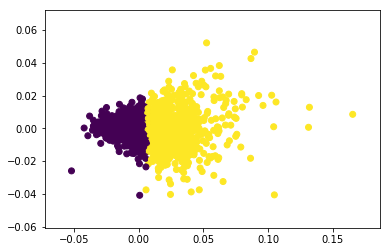

genderbool     0     1
row_0                 
0           1036  1127
1            403   598


In [46]:
# KMeans
X = df[['10k', '25k', '35k', '30k', '5k', '20k', '40k']]
y = df['genderbool']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.9,
    random_state=42)

X_norm = normalize(X_train)

X_pca = PCA(2).fit_transform(X_norm)
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

plt.scatter(X_pca[:,0], X_pca[:, 1], c=y_pred)
plt.show()

print(pd.crosstab(y_pred, y_train))

In [50]:
# Mean Shift
bandwidth = estimate_bandwidth(X_norm, quantile=0.5, n_samples=1000)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X_norm)

labels = ms.labels_

cluster_centers = ms.cluster_centers_

n_clusters_ = len(np.unique(labels))

print("Number of estimated clusters: {}".format(n_clusters_))

Number of estimated clusters: 11


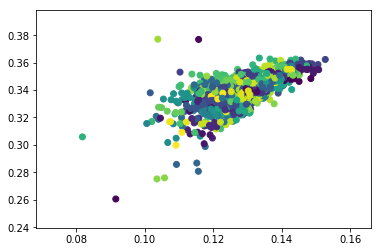

Comparing the assigned categories to the ones in the data:
col_0       0   1   2   3   4   5   6   7   8   9  ...  81  82  83  84  85  \
genderbool                                         ...                       
0            4   1   1  28   1   4  11  48   0   3 ...  54   2  11  35  19   
1           24   0   0  22   8   3  27  40   2   4 ...  41   7  22  10  18   

col_0        86  87  88  89  90  
genderbool                       
0            50   1  39   9   0  
1           115   2  27   6   3  

[2 rows x 91 columns]


In [57]:
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=labels)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train, labels))

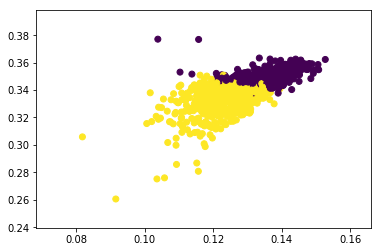

Comparing the assigned categories to the ones in the data:
col_0          0    1
genderbool           
0           1034  405
1           1123  602


In [52]:
from sklearn.cluster import SpectralClustering

# We know we're looking for three clusters.
n_clusters=2

# Declare and fit the model.
sc = SpectralClustering(n_clusters=n_clusters, affinity='rbf')
sc.fit(X_norm)

#Predicted clusters.
predict=sc.fit_predict(X_norm)

#Graph results.
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=predict)
plt.show()

print('Comparing the assigned categories to the ones in the data:')
print(pd.crosstab(y_train,predict))

In [53]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

# Declare the model and fit it in one statement.
# Note that you can provide arguments to the model, but we didn't.
af = AffinityPropagation().fit(X_norm)
print('Done')

# Pull the number of clusters and cluster assignments for each data point.
cluster_centers_indices = af.cluster_centers_indices_
n_clusters_ = len(cluster_centers_indices)
labels = af.labels_

print('Estimated number of clusters: {}'.format(n_clusters_))


Done
Estimated number of clusters: 91


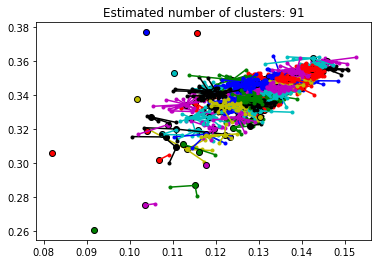

In [55]:
from itertools import cycle

plt.figure(1)
plt.clf()

# Cycle through each cluster and graph them with a center point for the
# exemplar and lines from the exemplar to each data point in the cluster
colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X_norm[cluster_centers_indices[k]]
    plt.plot(X_norm[class_members, 0], X_norm[class_members, 1], col + '.')
    plt.plot(cluster_center[0],
            cluster_center[1],
            'o',
            markerfacecolor=col,
            markeredgecolor='k')
    for x in X_norm[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)
        
plt.title('Estimated number of clusters: {}'.format(n_clusters_))
plt.show()